# Data Appendix

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Analysis Data/West_pomeranian_data.csv')
df.drop(columns='Unnamed: 0', axis =1, inplace=True)
df.head(4)

,PurchaseDays,Brand,CustomerAge,CustomerGender,Rate
0,6,Tefal,43.0,K,2.5
1,9,Electrolux,35.0,NaN,3.5
2,3,Beko,40.0,NaN,3.5
3,3,Tefal,37.0,NaN,1.5


In [3]:
df.describe(include='all')

,PurchaseDays,Brand,CustomerAge,CustomerGender,Rate
count,525.000000,525,467.000000,440,525.000000
unique,NaN,5,NaN,2,NaN
top,NaN,Tefal,NaN,K,NaN
freq,NaN,150,NaN,365,NaN
mean,6.998095,NaN,40.265525,NaN,2.332381
std,2.761167,NaN,9.338539,NaN,1.092348
min,1.000000,NaN,18.000000,NaN,0.000000
25%,5.000000,NaN,34.000000,NaN,1.500000
50%,7.000000,NaN,40.000000,NaN,2.500000
75%,9.000000,NaN,47.000000,NaN,3.000000


## 1. Gender and age structure of processed data

In [4]:
age_group_bins = [19, 30, 40, 50, 60, 70, 100]
bin_labels = ['19-30', '31-40', '41-50', '51-60', '61-70', '70+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=age_group_bins, labels=bin_labels, right=True)


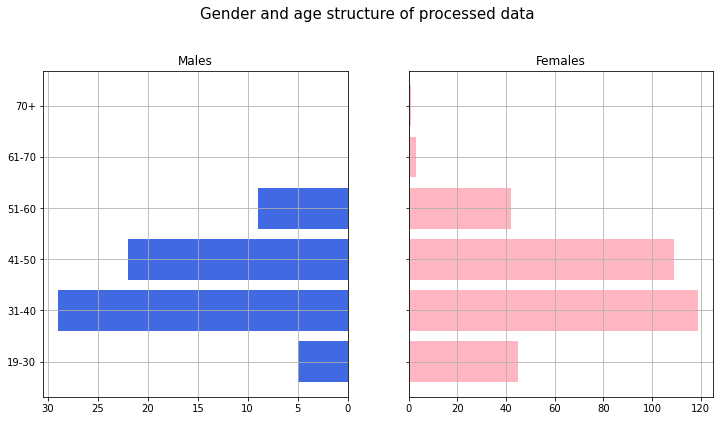

In [5]:
y = range(0, len(df[df["CustomerGender"] == 'M'].groupby("AgeGroup").count()['CustomerGender']))
x_male = df[df["CustomerGender"] == 'M'].groupby("AgeGroup").count()['CustomerGender']
x_female = df[df["CustomerGender"] == 'K'].groupby("AgeGroup").count()['CustomerGender']


fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))
plt.figtext(.5,1,"Gender and age structure of processed data", fontsize=15, ha='center')

axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females')

axes[1].grid()
axes[0].set(yticks=y, yticklabels=bin_labels)
axes[0].invert_xaxis()
axes[0].grid()

plt.show()

## 2. Popularity of brands by customers'gender

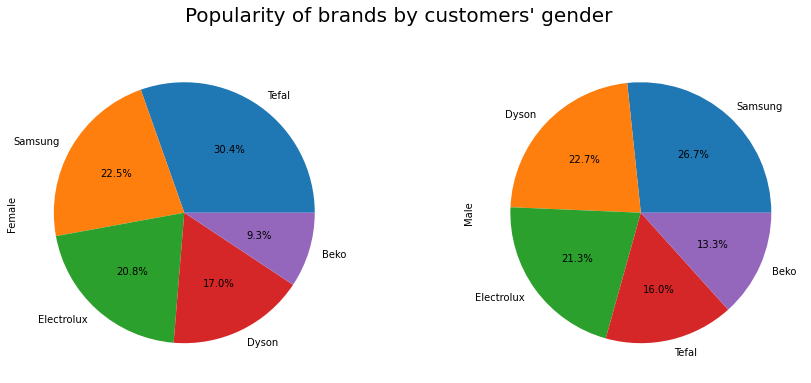

In [6]:
brand_counts_female = df[df['CustomerGender'] == "K"].value_counts(df['Brand'])
brand_counts_male = df[df['CustomerGender'] == "M"].value_counts(df['Brand'])

fig = plt.figure(figsize=(15,6))
fig.set_facecolor('white')
fig.suptitle("Popularity of brands by customers' gender", fontsize=20)

plt.subplot(121)
brand_counts_female.plot(kind='pie', ylabel= 'Female',autopct='%1.1f%%')
plt.subplot(122)
brand_counts_male.plot(kind='pie',ylabel = 'Male',autopct='%1.1f%%')
plt.show()

## 3.Days from purchase

In [7]:
avg_rate_days = pd.DataFrame(df.groupby("PurchaseDays").count()['Rate'])
avg_rate_days['AvgRate'] = pd.DataFrame(df.groupby("PurchaseDays").mean()['Rate'])
avg_rate_days

,Rate,AvgRate
PurchaseDays,,
1,3,1.666667
2,13,2.192308
3,36,2.166667
4,43,2.093023
5,63,2.396825
6,85,2.182353
7,74,2.405405
8,68,2.500000
9,50,2.400000


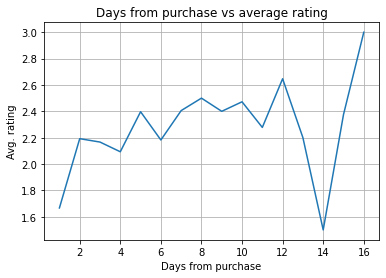

In [8]:

avg_rate_days.AvgRate.plot(kind='line',grid=True,title="Days from purchase vs average rating", xlabel="Days from purchase",ylabel="Avg. rating")
plt.show()

## 4. Average ratings of vacuume cleaners by brand and gender

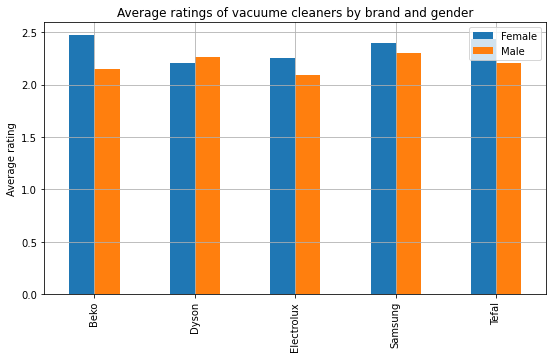

In [9]:
plt.figure(figsize=(9, 5))
df.pivot_table('Rate', index='Brand', columns='CustomerGender', aggfunc='mean').plot(kind='bar', ylabel='Average rating', xlabel='', ax=plt.gca())
plt.legend(['Female','Male'])
plt.title('Average ratings of vacuume cleaners by brand and gender')
plt.grid(True)
plt.show()

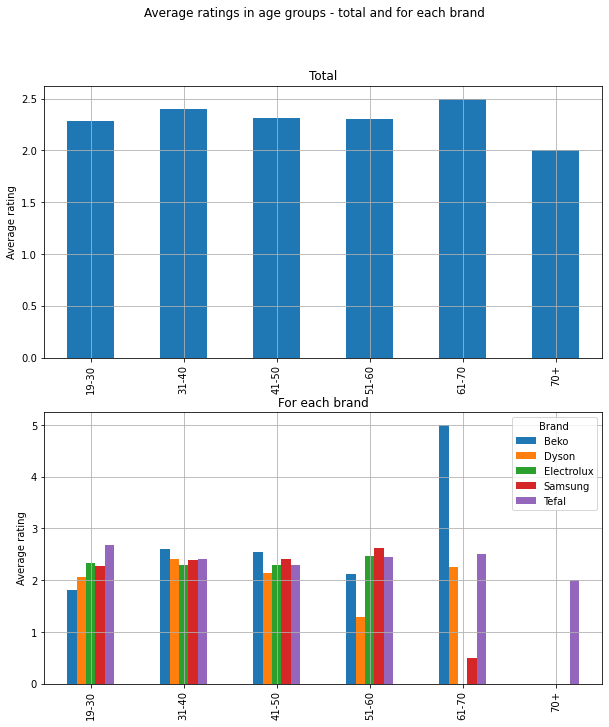

In [10]:
fig = plt.figure(figsize=(10,11))
fig.suptitle("Average ratings in age groups - total and for each brand")

plt.subplot(211)
df.groupby('AgeGroup')['Rate'].mean().plot(
                                        kind='bar',
                                        xlabel='', 
                                        ylabel='Average rating',
                                        title ="Total",
                                        grid = True,
                                        ax=plt.gca())

plt.subplot(212)
df.pivot_table('Rate', index='AgeGroup', columns='Brand', aggfunc='mean').plot(
                                                                            kind='bar', 
                                                                            ylabel='Average rating', 
                                                                            xlabel='',
                                                                            title ="For each brand",
                                                                            grid = True, 
                                                                            ax=plt.gca())
plt.show()

## 4. "Ratings" - variable distribution

### Ratings distribution - frequency histogram

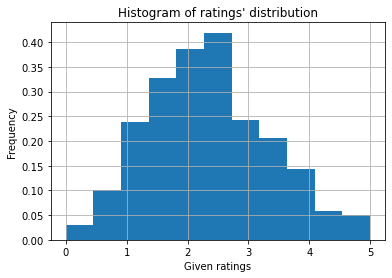

In [11]:
hist= df.Rate.plot(kind='hist', title="Histogram of ratings' distribution", density=True, bins=11, grid= True)
hist.set_xlabel("Given ratings")
plt.show()

### Kernel density etimate

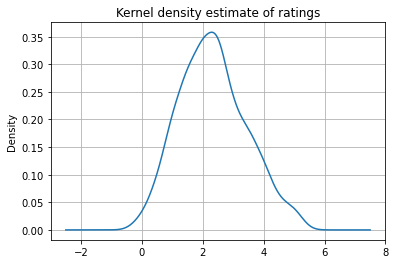

In [12]:
kde = df.Rate.plot(kind='density', title='Kernel density estimate of ratings',grid = True)
plt.show()

### Empirical distribution of ratings

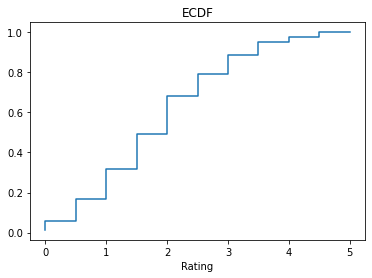

In [13]:
def ECDF(series):
    ser=series.value_counts().sort_index().cumsum()/len(series)
    ser.index.name='Rating'
    ser.name='Probability'
    return ser
ECDF(df.Rate).plot(title='ECDF',drawstyle="steps")
plt.show()